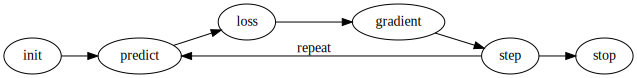

In [37]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

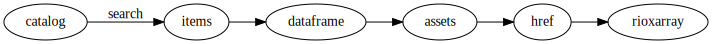

In [46]:
gv('''catalog->items[label=search]
items->dataframe->assets->href->rioxarray
''')

In [47]:
search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=[-124.2751, 45.5469, -110.9613, 47.7458],
    datetime="2020-12-26/2020-12-31",
)
items = search.get_all_items()


df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")

df[["geometry", "datetime", "s2:mgrs_tile", "eo:cloud_cover"]].explore(
    column="eo:cloud_cover", style_kwds={"fillOpacity": 0.1}
)

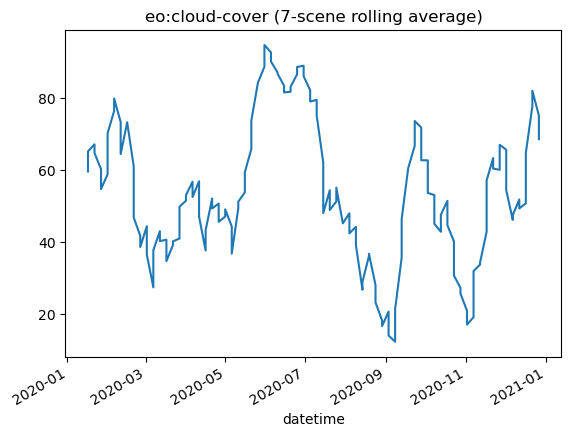

In [49]:
search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=[-124.2751, 45.5469, -123.9613, 45.7458],
    datetime="2020-01-01/2020-12-31",
)
items = search.get_all_items()
df = geopandas.GeoDataFrame.from_features(items.to_dict())
df["datetime"] = pd.to_datetime(df["datetime"])

ts = df.set_index("datetime").sort_index()["eo:cloud_cover"].rolling(7).mean()
ts.plot(title="eo:cloud-cover (7-scene rolling average)");

# rioxarray subset tile?


In [28]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [29]:
time_range = "2020-12-01/2020-12-31"
bbox = [-122.2751, 47.5469, -121.9613, 47.7458]

search = catalog.search(collections=["landsat-c2-l2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)

8

In [30]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            [-122.2751, 47.5469],
            [-121.9613, 47.9613],
            [-121.9613, 47.9613],
            [-122.2751, 47.9613],
            [-122.2751, 47.5469],
        ]
    ],
}

time_range = "2020-12-01/2020-12-31"

search = catalog.search(
    collections=["landsat-c2-l2"], intersects=area_of_interest, datetime=time_range
)


In [31]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.0-CAPI-1.17.0). Conversions between both will be slow.
  warnings.warn(


,geometry,gsd,created,sci:doi,datetime,platform,proj:epsg,proj:shape,description,instruments,...,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category
0,"POLYGON ((-122.72549 48.50884, -120.29248 48.0...",30,2022-05-06T18:04:17.126358Z,10.5066/P9OGBGM6,2020-12-29T18:55:56.738265Z,landsat-8,32610,"[7881, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80460272020364LGN00,046,2,162.253231,L2SP,17.458298,100.00,02,T2
1,"POLYGON ((-124.52046 48.44245, -121.93932 48.0...",30,2022-05-06T17:25:29.626986Z,10.5066/P9C7I13B,2020-12-28T18:20:32.609164Z,landsat-7,32610,"[7361, 8341]",Landsat Collection 2 Level-2,[etm+],...,027,LE70470272020363EDC00,047,2,152.689113,L2SP,14.678880,32.00,02,T1
2,"POLYGON ((-122.96802 48.44547, -120.39024 48.0...",30,2022-05-06T18:01:04.319403Z,10.5066/P9C7I13B,2020-12-21T18:14:50.812768Z,landsat-7,32610,"[7251, 8251]",Landsat Collection 2 Level-2,[etm+],...,027,LE70460272020356EDC00,046,2,153.649177,L2SP,14.779612,24.00,02,T2
3,"POLYGON ((-124.27547 48.50831, -121.84167 48.0...",30,2022-05-06T17:46:22.246696Z,10.5066/P9OGBGM6,2020-12-20T19:02:09.878796Z,landsat-8,32610,"[7971, 7861]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80470272020355LGN00,047,2,163.360118,L2SP,17.414441,100.00,02,T2
4,"POLYGON ((-122.72996 48.50858, -120.29690 48.0...",30,2022-05-06T18:04:16.935800Z,10.5066/P9OGBGM6,2020-12-13T18:56:00.096447Z,landsat-8,32610,"[7881, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80460272020348LGN00,046,2,164.126188,L2SP,17.799744,98.64,02,T2
5,"POLYGON ((-124.51935 48.44597, -121.93965 48.0...",30,2022-05-06T17:25:29.412798Z,10.5066/P9C7I13B,2020-12-12T18:21:42.991249Z,landsat-7,32610,"[7361, 8341]",Landsat Collection 2 Level-2,[etm+],...,027,LE70470272020347EDC00,047,2,154.692691,L2SP,15.427422,12.00,02,T1
6,"POLYGON ((-122.98709 48.44790, -120.40945 48.0...",30,2022-05-06T18:01:04.178839Z,10.5066/P9C7I13B,2020-12-05T18:16:03.755599Z,landsat-7,32610,"[7281, 8251]",Landsat Collection 2 Level-2,[etm+],...,027,LE70460272020340EDC00,046,2,155.308739,L2SP,16.313570,2.00,02,T1
7,"POLYGON ((-124.27385 48.50833, -121.83965 48.0...",30,2022-05-06T17:46:22.097338Z,10.5066/P9OGBGM6,2020-12-04T19:02:11.194486Z,landsat-8,32610,"[7971, 7861]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80470272020339LGN00,047,2,164.914060,L2SP,18.807230,1.90,02,T1


In [32]:
selected_item = min(items, key=lambda item: item.properties["eo:cloud_cover"])
selected_item

<Item id=LC08_L2SP_047027_20201204_02_T1>

In [33]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                          ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                          │
│ ang              │ Angle Coefficients File                                              │
│ red              │ Red Band                                                             │
│ blue             │ Blue Band                                                            │
│ drad             │ Downwelled Radiance Band                                             │
│ emis             │ Emissivity Band                                                      │
│ emsd             │ Emissivity Standard Deviation Band                                   │
│ trad             │ Thermal Radiance Band                                                │
│ urad             │ Upwelled Radiance Band                                               │
│ atran            │ Atmospheric Transmittance Band                                       │
│ cdist            │ Cloud Distance Band                                                  │
│ green            │ Green Band                                                           │
│ nir08            │ Near Infrared Band 0.8                                               │
│ lwir11           │ Surface Temperature Band                                             │
│ swir16           │ Short-wave Infrared Band 1.6                                         │
│ swir22           │ Short-wave Infrared Band 2.2                                         │
│ coastal          │ Coastal/Aerosol Band                                                 │
│ mtl.txt          │ Product Metadata File (txt)                                          │
│ mtl.xml          │ Product Metadata File (xml)                                          │
│ mtl.json         │ Product Metadata File (json)                                         │
│ qa_pixel         │ Pixel Quality Assessment Band                                        │
│ qa_radsat        │ Radiometric Saturation and Terrain Occlusion Quality Assessment Band │
│ qa_aerosol       │ Aerosol Quality Assessment Band                                      │
│ tilejson         │ TileJSON with default rendering                                      │
│ rendered_preview │ Rendered preview                                                     │
└──────────────────┴──────────────────────────────────────────────────────────────────────┘

In [9]:
catalog = Catalog.from_file("https://planetarycomputer.microsoft.com/api/stac/v1")
print(f"ID: {catalog.id}")
print(f"Title: {catalog.title or 'N/A'}")
print(f"Description: {catalog.description or 'N/A'}")

ID: microsoft-pc
Title: Microsoft Planetary Computer STAC API
Description: Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer


In [12]:
print(get_stac_version())

1.0.0


In [11]:
from pystac import Catalog, get_stac_version

In [13]:
collections = list(catalog.get_collections())

print(f"Number of collections: {len(collections)}")
print("Collections IDs:")
for collection in collections:
    print(f"- {collection.id}")

Number of collections: 86
Collections IDs:
- daymet-annual-pr
- goes-cmi
- daymet-daily-na
- fia
- sentinel-1-rtc
- nrcan-landcover
- esa-worldcover
- eclipse
- sentinel-1-grd
- 3dep-lidar-dsm
- daymet-daily-hi
- 3dep-seamless
- daymet-monthly-hi
- daymet-monthly-pr
- io-lulc
- terraclimate
- cop-dem-glo-90
- cop-dem-glo-30
- daymet-annual-na
- gnatsgo-tables
- hgb
- gridmet
- nasa-nex-gddp-cmip6
- gpm-imerg-hhr
- daymet-monthly-na
- daymet-annual-hi
- cil-gdpcir-cc-by
- 3dep-lidar-intensity
- 3dep-lidar-copc
- ecmwf-forecast
- io-lulc-9-class
- cil-gdpcir-cc0
- gnatsgo-rasters
- noaa-c-cap
- 3dep-lidar-hag
- 3dep-lidar-pointsourceid
- nasadem
- modis-64A1-061
- alos-fnf-mosaic
- chloris-biomass
- 3dep-lidar-returns
- era5-pds
- mobi
- modis-10A2-061
- naip
- mtbs
- landsat-8-c2-l2
- 3dep-lidar-dtm
- 3dep-lidar-classification
- modis-15A3H-061
- modis-11A2-061
- daymet-daily-pr
- gap
- modis-17A2H-061
- cil-gdpcir-cc-by-sa
- 3dep-lidar-dtm-native
- modis-10A1-061
- modis-17A2HGF-061
- 

In [15]:
collection = catalog.get_child("sentinel-2-l2a")
assert collection is not None

In [22]:
dd(collection)

add_asset                      description                    get_item                       links                          save_object                    
add_child                      extent                         get_item_links                 make_all_asset_hrefs_absolute  self_href                      
add_children                   extra_fields                   get_items                      make_all_asset_hrefs_relative  set_parent                     
add_item                       from_dict                      get_links                      map_assets                     set_root                       
add_items                      from_file                      get_parent                     map_items                      set_self_href                  
add_link                       full_copy                      get_root                       matches_object_type            stac_extensions                
add_links                      generate_subcatalogs           ge

In [25]:
collection.get_all_items()

<generator object Catalog.get_all_items at 0x7f9aa2c61d20>

In [26]:
items = list(collection.get_all_items())

print(f"Number of items: {len(items)}")
for item in items:
    print(f"- {item.id}")

Number of items: 0
